In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import missingno as mano
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime, timedelta
from sklearn import preprocessing
import pyodbc
from scipy.stats import normaltest, shapiro, chisquare, kstest

In [106]:
import import_ipynb

In [107]:
import Template as tm

In [108]:
df_bank=tm.load_data('data.csv','csv')

In [109]:
tm.df_details(df_bank) # There are 96 columns altogether. Som eof them might be irrelvant to our target.

Shape:  (6819, 96)
Column types: 
Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object
H/T?H


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [110]:
tm.missing_count(df_bank) #no missing values in the dataset

,Missing percentage,Missing sum
Bankrupt?,0.0,0
ROA(C) before interest and depreciation before interest,0.0,0
ROA(A) before interest and % after tax,0.0,0
ROA(B) before interest and depreciation after tax,0.0,0
Operating Gross Margin,0.0,0
...,...,...
Liability to Equity,0.0,0
Degree of Financial Leverage (DFL),0.0,0
Interest Coverage Ratio (Interest expense to EBIT),0.0,0
Net Income Flag,0.0,0


In [111]:
df_bank=tm.remove_columns(df_bank,[' Net Income Flag'])

In [112]:
corr_matrix=df_bank.corr()
x=corr_matrix
x=pd.DataFrame(x['Bankrupt?'])
y=pd.DataFrame()
y['columns']=x.index

x.reset_index(drop=True,inplace=True)
y['corr']=x['Bankrupt?']
y
ban=df_bank['Bankrupt?']
z=[]
for rows in range(y.shape[0]):
    if (y['corr'][rows]>0.1 and y['corr'][rows]<0.8) or (y['corr'][rows]<-0.1 and y['corr'][rows]>-0.8):
        z.append(y['columns'][rows])
print(z)
print(len(z)) # merely 32 columns have correlation that is reasonable to keep them. All other columns have insignificant correlation with bankruptcy

[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Cash/Total Assets', ' Current Liability to Assets', ' Working Capital/Equity', ' Current Liabilities/Equity', ' Retained Earnings to Total Assets', ' Total expense/Assets', ' Current Liability to Equity', ' Equity to Long-term Liability', ' CFO to Assets', ' Current Liability to Current Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Gross Profit to Sales', " Net Income to Stockhold

In [113]:
#df_bank=pd.DataFrame()
for i in df_bank.columns:
    if i not in z:
        df_bank=tm.remove_columns(df_bank,[i])
df_bank #removed all other columns

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),...,Total expense/Assets,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity
0,0.370594,0.424389,0.405750,0.601457,0.000000,0.147950,0.147950,0.147950,0.169141,0.095921,...,0.064856,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202
1,0.464291,0.538214,0.516730,0.610235,0.000000,0.182251,0.182251,0.182251,0.208944,0.093722,...,0.025516,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846
2,0.426071,0.499019,0.472295,0.601450,0.000000,0.177911,0.177911,0.193713,0.180581,0.092338,...,0.021387,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189
3,0.399844,0.451265,0.457733,0.583541,0.000000,0.154187,0.154187,0.154187,0.193722,0.077762,...,0.024161,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721
4,0.465022,0.538432,0.522298,0.598783,0.000000,0.167502,0.167502,0.167502,0.212537,0.096898,...,0.026385,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.113372,0.175045,0.175045,0.175045,0.216602,0.098200,...,0.019060,0.330914,0.112622,0.587178,0.027951,0,0.799927,0.604455,0.840359,0.279606
6815,0.475162,0.538269,0.524172,0.598308,0.371596,0.181324,0.181324,0.181324,0.216697,0.098608,...,0.011118,0.329753,0.112329,0.569498,0.031470,0,0.799748,0.598306,0.840306,0.278132
6816,0.472725,0.533744,0.520638,0.610444,0.490839,0.269521,0.269521,0.269521,0.210929,0.100073,...,0.035446,0.326921,0.110933,0.589341,0.007542,0,0.797778,0.610441,0.840138,0.275789
6817,0.506264,0.559911,0.554045,0.607850,0.181294,0.213392,0.213392,0.213392,0.228326,0.111799,...,0.016443,0.329294,0.110957,0.678338,0.022916,0,0.811808,0.607846,0.841084,0.277547


In [116]:
df_bank['Bankrupt?']=ban


In [117]:
df_bank.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),...,Current Liability to Equity,Equity to Long-term Liability,CFO to Assets,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.0,0.147950,0.147950,0.147950,0.169141,0.095921,...,0.339077,0.126549,0.520382,0.118250,0,0.716845,0.601453,0.827890,0.290202,1
1,0.464291,0.538214,0.516730,0.610235,0.0,0.182251,0.182251,0.182251,0.208944,0.093722,...,0.329740,0.120916,0.567101,0.047775,0,0.795297,0.610237,0.839969,0.283846,1
2,0.426071,0.499019,0.472295,0.601450,0.0,0.177911,0.177911,0.193713,0.180581,0.092338,...,0.334777,0.117922,0.538491,0.025346,0,0.774670,0.601449,0.836774,0.290189,1
3,0.399844,0.451265,0.457733,0.583541,0.0,0.154187,0.154187,0.154187,0.193722,0.077762,...,0.331509,0.120760,0.604105,0.067250,0,0.739555,0.583538,0.834697,0.281721,1
4,0.465022,0.538432,0.522298,0.598783,0.0,0.167502,0.167502,0.167502,0.212537,0.096898,...,0.330726,0.110933,0.578469,0.047725,0,0.795016,0.598782,0.839973,0.278514,1


0    6599
1     220
Name: Bankrupt?, dtype: int64


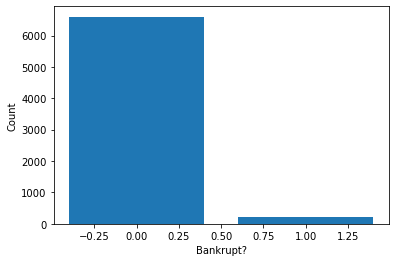

In [120]:
tm.categorical_count(df_bank,'Bankrupt?') #extremely high imbalance. Might need to oversample the data later

Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 5
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.50      0.20      0.28        51

    accuracy                           0.96      1364
   macro avg       0.73      0.59      0.63      1364
weighted avg       0.95      0.96      0.95      1364

Accuracy(%): 
96.26099706744868
Precision(%): 
50.0
F1 score: 
0.28169014084507044
Logistic loss: 
1.291411724424302


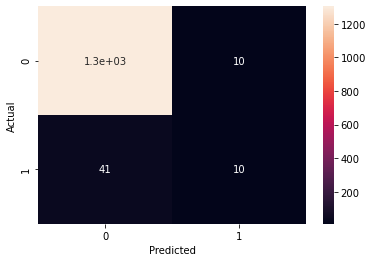

In [118]:
tm.ml(df_bank,'Bankrupt?','KNN') #knn without oversampling

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 5
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1313
           1       0.27      0.51      0.36        51

    accuracy                           0.93      1364
   macro avg       0.63      0.73      0.66      1364
weighted avg       0.95      0.93      0.94      1364

Accuracy(%): 
93.10850439882698
Precision(%): 
27.368421052631582
F1 score: 
0.3561643835616438
Logistic loss: 
2.3802787047978655


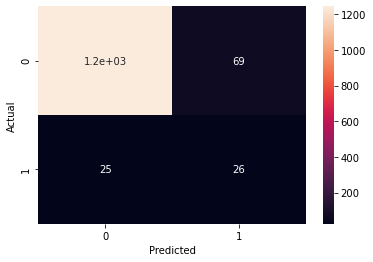

In [121]:
tm.ml(df_bank,'Bankrupt?','KNN') #knn with oversampling

What do you want your test size to be? 0.2


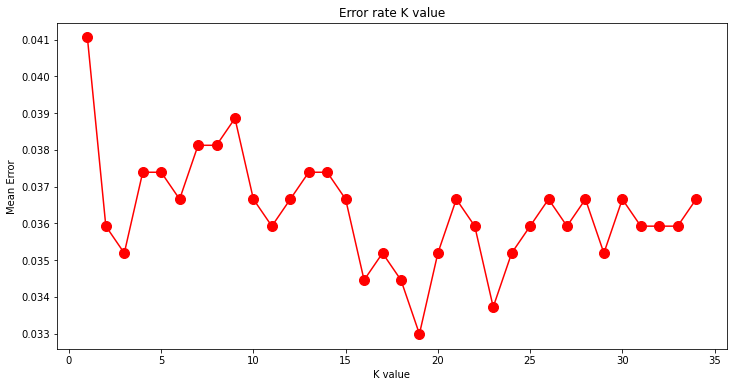

In [122]:
tm.error_rate_plot(df_bank, 'Bankrupt?', classification=True, oversample=False)

What do you want your test size to be? 0.2


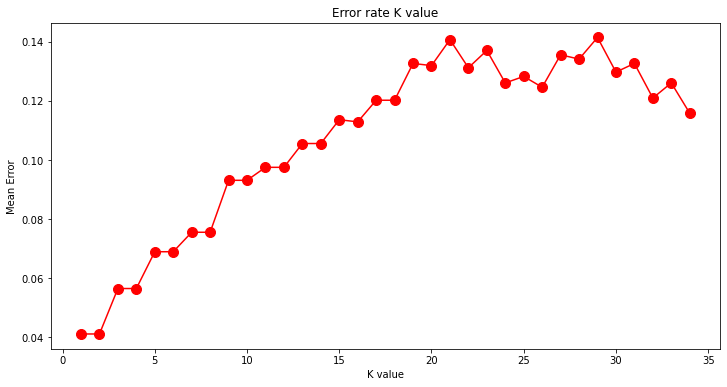

In [123]:
tm.error_rate_plot(df_bank, 'Bankrupt?', classification=True, oversample=True)

Do you want to oversample your training data? (0/1): 0
Enter number of neighbors: 19
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.80      0.16      0.26        51

    accuracy                           0.97      1364
   macro avg       0.88      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364

Accuracy(%): 
96.7008797653959
Precision(%): 
80.0
F1 score: 
0.2622950819672131
Logistic loss: 
1.1394769332594152


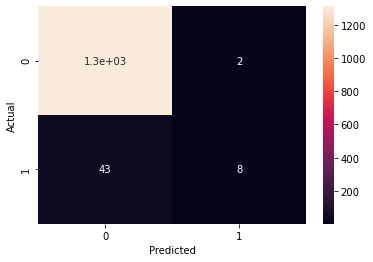

In [124]:
tm.ml(df_bank,'Bankrupt?','KNN') #knn without oversampling

Do you want to oversample your training data? (0/1): 1
Enter number of neighbors: 1
What do you want your test size to be? 0.2
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1313
           1       0.43      0.29      0.35        51

    accuracy                           0.96      1364
   macro avg       0.70      0.64      0.66      1364
weighted avg       0.95      0.96      0.96      1364

Accuracy(%): 
95.89442815249268
Precision(%): 
42.857142857142854
F1 score: 
0.3488372093023256
Logistic loss: 
1.418026004445457


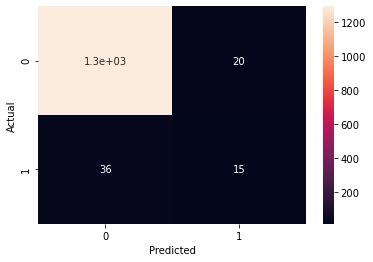

In [125]:
tm.ml(df_bank,'Bankrupt?','KNN') #knn with oversampling